In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 모델 저장
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from keras import backend as K

import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# seed값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df_pre = pd.read_csv('../data/wine.csv', header = None)

In [17]:
# sample() 원본 데이터의 몇 %를 사용할 것인지 , frac = 15 원본의 15%
df = df_pre.sample(frac=0.15)
dataset = df.values
X = dataset[:, 0:12]
X = np.asarray(X).astype(np.float32)
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X, Y, epochs = 200, batch_size=200)
print('\n Accuray: %.4f' %(model.evaluate(X, Y)[1]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_13 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5510 - accuracy: 0.7354
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7301 - accuracy: 0.6656
Epoch 3/200
5/5 [==============================] - 0s 998us/

5/5 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.9364
Epoch 75/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9364
Epoch 76/200
5/5 [==============================] - 0s 997us/step - loss: 0.1856 - accuracy: 0.9333
Epoch 77/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1817 - accuracy: 0.9364
Epoch 78/200
5/5 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.93 - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9385
Epoch 79/200
5/5 [==============================] - 0s 997us/step - loss: 0.1801 - accuracy: 0.9385
Epoch 80/200
5/5 [==============================] - 0s 997us/step - loss: 0.1788 - accuracy: 0.9426
Epoch 81/200
5/5 [==============================] - 0s 997us/step - loss: 0.1778 - accuracy: 0.9415
Epoch 82/200
5/5 [==============================] - 0s 997us/step - loss: 0.1774 - accuracy: 0.9385
Epoch 83/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1764 

5/5 [==============================] - 0s 792us/step - loss: 0.1252 - accuracy: 0.9559
Epoch 156/200
5/5 [==============================] - 0s 798us/step - loss: 0.1266 - accuracy: 0.9662
Epoch 157/200
5/5 [==============================] - 0s 803us/step - loss: 0.1240 - accuracy: 0.9569
Epoch 158/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.9651
Epoch 159/200
5/5 [==============================] - 0s 997us/step - loss: 0.1246 - accuracy: 0.9528
Epoch 160/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9621
Epoch 161/200
5/5 [==============================] - 0s 798us/step - loss: 0.1233 - accuracy: 0.9590
Epoch 162/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.9651
Epoch 163/200
5/5 [==============================] - 0s 998us/step - loss: 0.1244 - accuracy: 0.9631
Epoch 164/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9631
Epoch 165/20

In [23]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정 
modelpath ='./model/{epoch:02d}-{val_loss:.4f}.hdf5'

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss',
                              verbose=1, save_best_only=True) 
# save_best_only : 향상되었을 떄만 저장

# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200,
         verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.07799, saving model to ./model/01-0.0780.hdf5

Epoch 00002: val_loss improved from 0.07799 to 0.07753, saving model to ./model/02-0.0775.hdf5

Epoch 00003: val_loss did not improve from 0.07753

Epoch 00004: val_loss did not improve from 0.07753

Epoch 00005: val_loss improved from 0.07753 to 0.07666, saving model to ./model/05-0.0767.hdf5

Epoch 00006: val_loss did not improve from 0.07666

Epoch 00007: val_loss did not improve from 0.07666

Epoch 00008: val_loss did not improve from 0.07666

Epoch 00009: val_loss did not improve from 0.07666

Epoch 00010: val_loss improved from 0.07666 to 0.07661, saving model to ./model/10-0.0766.hdf5

Epoch 00011: val_loss did not improve from 0.07661

Epoch 00012: val_loss improved from 0.07661 to 0.07623, saving model to ./model/12-0.0762.hdf5

Epoch 00013: val_loss improved from 0.07623 to 0.07452, saving model to ./model/13-0.0745.hdf5

Epoch 00014: val_loss did not improve from 0.07452

Epoch 00015


Epoch 00154: val_loss did not improve from 0.07240

Epoch 00155: val_loss did not improve from 0.07240

Epoch 00156: val_loss did not improve from 0.07240

Epoch 00157: val_loss did not improve from 0.07240

Epoch 00158: val_loss did not improve from 0.07240

Epoch 00159: val_loss did not improve from 0.07240

Epoch 00160: val_loss did not improve from 0.07240

Epoch 00161: val_loss did not improve from 0.07240

Epoch 00162: val_loss did not improve from 0.07240

Epoch 00163: val_loss did not improve from 0.07240

Epoch 00164: val_loss did not improve from 0.07240

Epoch 00165: val_loss did not improve from 0.07240

Epoch 00166: val_loss did not improve from 0.07240

Epoch 00167: val_loss did not improve from 0.07240

Epoch 00168: val_loss did not improve from 0.07240

Epoch 00169: val_loss did not improve from 0.07240

Epoch 00170: val_loss did not improve from 0.07240

Epoch 00171: val_loss did not improve from 0.07240

Epoch 00172: val_loss did not improve from 0.07240

Epoch 00173

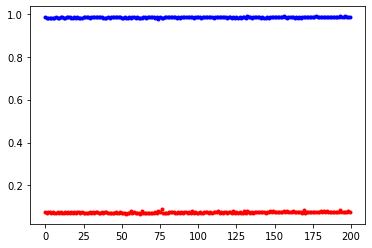

In [24]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()